In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from random import sample
from collections import defaultdict
import graphviz 
import pandas

print('Loaded imports')

Loaded imports


In [85]:
h1b_df = pandas.read_csv('../data/h1b.csv')
perm_df = pandas.read_csv('../data/perm.csv', thousands=",")

h1b_df = h1b_df[['FULL_TIME_POSITION', 'YEAR', 'PREVAILING_WAGE', 'CASE_STATUS']]
perm_df = perm_df[['naics_2007_us_code', 'wage_offer_from_9089', 'case_status', 'wage_offer_unit_of_pay_9089', 'country_of_citzenship', 'employer_state', 'pw_level_9089']]

# h1b_df = h1b_df.sample(n=100000)
print('Loaded dataframes')

/Users/philip/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loaded dataframes


In [112]:
# format data
firstDataset = False

df = None
df_x = None
df_y = None
to_encode = []

if firstDataset:
    df = h1b_df.copy()
    df_x = ['FULL_TIME_POSITION', 'YEAR', 'PREVAILING_WAGE']
    df_y = 'CASE_STATUS'
else:
    df = perm_df.copy()
    df_x = ['naics_2007_us_code', 'wage_offer_unit_of_pay_9089', 'country_of_citzenship', 'employer_state', 'employer_state', 'pw_level_9089']
    df_y = 'case_status'
    to_encode = [ 'country_of_citzenship', 'employer_state', 'pw_level_9089']
    
    
le = preprocessing.LabelEncoder
encoderDict = defaultdict(le)

for column in to_encode:
    print('Encoding: ' + column)
    df[column] = df[column].dropna()
    df = df[df[column].notnull()]
    df[column] = encoderDict[column].fit_transform(df[column])
#     print(encoderDict[column].classes_)

if firstDataset:
#     df['CITY'], df['STATE'] = df['WORKSITE'].str.split(',', 1).str
#     df['STATE'] = df['STATE'].str.strip()
#     df['STATE'].apply(str)

    df.loc[(df['FULL_TIME_POSITION'] == 'Y'), 'FULL_TIME_POSITION'] = 1
    df.loc[(df['FULL_TIME_POSITION'] == 'N'), 'FULL_TIME_POSITION'] = -1
    
    df = df[~df['CASE_STATUS'].str.contains("WITHDRAWN", na=True)]
    df = df[~df['CASE_STATUS'].str.contains("PENDING")]
    df = df[~df['CASE_STATUS'].str.contains("INVALIDATED")]
    df.loc[(df['CASE_STATUS'] == 'CERTIFIED'), 'CASE_STATUS'] = 1
    df.loc[(df['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN'), 'CASE_STATUS'] = 1
    df.loc[(df['CASE_STATUS'] == 'DENIED'), 'CASE_STATUS'] = -1
    df.loc[(df['CASE_STATUS'] == 'REJECTED'), 'CASE_STATUS'] = -1
    
else:
    df = df[~df['case_status'].str.contains("Withdrawn", na=False)]
    df.loc[(df['case_status'].str.contains('Certified', na=False)), 'case_status'] = 1
    df.loc[(df['case_status'].str.contains('Denied', na=False)), 'case_status'] = -1
    
    df.loc[(df['wage_offer_unit_of_pay_9089'].str.contains('yr', na=False)), 'wage_offer_unit_of_pay_9089'] = 2
    df.loc[(df['wage_offer_unit_of_pay_9089'].str.contains('hr', na=False)), 'wage_offer_unit_of_pay_9089'] = 1
#     df['wage_offer_from_9089'] = df['wage_offer_from_9089'].str.replace('#############', '')  
#     df['wage_offer_from_9089'] = df['wage_offer_from_9089'].str.replace(',', '').astype('float64')
    
    
df = df.apply(lambda x: pandas.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))

# print(df[:10])
# indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
# df = df[indices_to_keep]

print(df_x)
print(df_y)

print(df.columns)
print(df.dtypes)


Encoding: country_of_citzenship
Encoding: employer_state
Encoding: pw_level_9089
['naics_2007_us_code', 'wage_offer_unit_of_pay_9089', 'country_of_citzenship', 'employer_state', 'employer_state', 'pw_level_9089']
case_status
Index(['naics_2007_us_code', 'wage_offer_from_9089', 'case_status',
       'wage_offer_unit_of_pay_9089', 'country_of_citzenship',
       'employer_state', 'pw_level_9089'],
      dtype='object')
naics_2007_us_code             float64
wage_offer_from_9089           float64
case_status                      int64
wage_offer_unit_of_pay_9089    float64
country_of_citzenship            int64
employer_state                   int64
pw_level_9089                    int64
dtype: object


In [127]:

df = df.dropna()  
sample = df.sample(n=10000)
# print(df[:100])

X = df.loc[:, df_x]
y = df.loc[:, df_y]
print(df.size)

print(df_x)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


127652
['naics_2007_us_code', 'wage_offer_unit_of_pay_9089', 'country_of_citzenship', 'employer_state', 'employer_state', 'pw_level_9089']


In [114]:
statuses=['denied', 'approved']
for i in range(1,15 + 1): 
    clf = tree.DecisionTreeClassifier(max_depth=i, criterion='gini', splitter='random')
    clf = classifier.fit(x_train, y_train)

    y_predict = clf.predict(x_test)
    print(str(i) + ': ' + str(accuracy_score(y_test, y_predict))) 
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_x,  
                         class_names=statuses,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data).view()

1: 0.867117528788
2: 0.867848656553
3: 0.868397002376
4: 0.8689453482
5: 0.868214220435
6: 0.868762566258
7: 0.8689453482
8: 0.868762566258
9: 0.865289709377
10: 0.864924145494
11: 0.861268506672
12: 0.852860537379
13: 0.84829098885
14: 0.840065801499
15: 0.839517455675


In [125]:
from sklearn.ensemble import AdaBoostClassifier
estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30,40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 350, 400, 450, 500]
for estimator in estimators:
    clf = AdaBoostClassifier(n_estimators=estimator)
    scores = cross_val_score(clf, X, y)
    print(str(estimator) + ': ' + str(scores.mean()))

1: 0.864608465955
2: 0.858521938565
3: 0.85917995957
4: 0.85928962673
5: 0.858796133531
6: 0.865211698487
7: 0.85939929389
8: 0.85928968086
9: 0.864279491539
10: 0.864389221851
15: 0.865266523046
20: 0.861318478215
30: 0.862140990938
40: 0.86192167466
50: 0.862853854544
60: 0.862031341821
70: 0.861318514301
80: 0.861921683682
90: 0.861921683682
100: 0.861592691223
125: 0.860879836639
150: 0.861208847141
175: 0.861483042106
200: 0.861373383968
250: 0.861044364444
300: 0.860989503799
350: 0.861373365925
400: 0.860057360003
450: 0.860057332938
500: 0.86044117702


In [146]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

clf = MLPClassifier(solver='sgd', activation='relu', max_iter=1500, alpha=0.001, batch_size=200, hidden_layer_sizes=(150, ), random_state=42)

scaler = StandardScaler()
scaler.fit(x_train) 
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(str(accuracy_score(y_test, y_predict)))

0.867117528788



learning on dataset Test
training: constant learning-rate
Training set score: 0.864992
Training set loss: 0.383828
training: constant with momentum
Training set score: 0.864608
Training set loss: 0.385355
training: constant with Nesterov's momentum
Training set score: 0.866034
Training set loss: 0.378993
training: inv-scaling learning-rate
Training set score: 0.864608
Training set loss: 0.389038
training: inv-scaling with momentum
Training set score: 0.864608
Training set loss: 0.385291
training: inv-scaling with Nesterov's momentum
Training set score: 0.864608
Training set loss: 0.385300
training: adam
Training set score: 0.865212
Training set loss: 0.385509


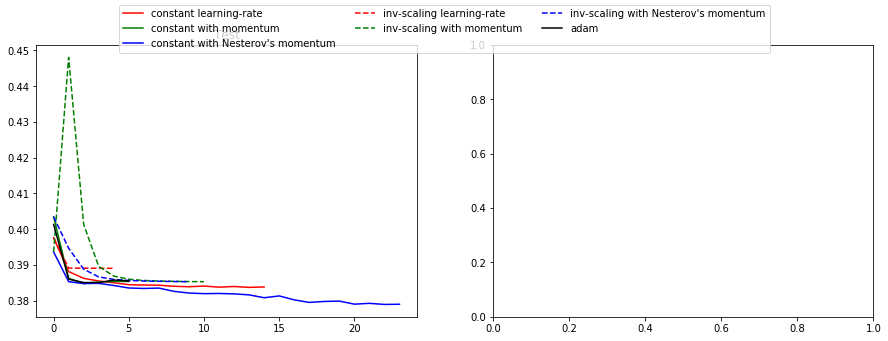

In [155]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# load / generate some toy datasets

plot_on_dataset(X, y, axes.ravel()[0], 'Test')

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
scores = cross_val_score(clf, X, y)
print(str(scores.mean()))

clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y)
print(str(scores.mean()))

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

k_vals = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 50]
for k in k_vals:
    for weight in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(k, weights=weight)
        clf.fit(X, y)
        
        y_predict = clf.predict(x_test)
        print(str(k) + ': ' + str(accuracy_score(y_test, y_predict))) 

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#         y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#         xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                              np.arange(y_min, y_max, h))
#         Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         plt.figure()
#         plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#         # Plot also the training points
#         plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
#                     edgecolor='k', s=20)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
#         plt.title("3-Class classification (k = %i, weights = '%s')"
#                   % (n_neighbors, weights))

    plt.show()